In [2]:
import os
import torch
import numpy as np
from PIL import Image 
from pathlib import Path
import matplotlib.pyplot as plt

from utils.config import Config
from utils.siren import LatentModulatedSiren
from utils.examination_helpers import (
    get_last_checkpoint_path
)
from utils.helpers import get_coordinate_grid



In [3]:

# Obtain config
config = Config.from_yaml()

# Load trained model and latent vectors
checkpoints = config.paths.checkpoint_dir
ckpt_path = get_last_checkpoint_path(checkpoints)

ckpt = torch.load(ckpt_path)

config = ckpt['config']

model = LatentModulatedSiren(**config)
model.load_state_dict(ckpt['model_state_dict'])


<All keys matched successfully>

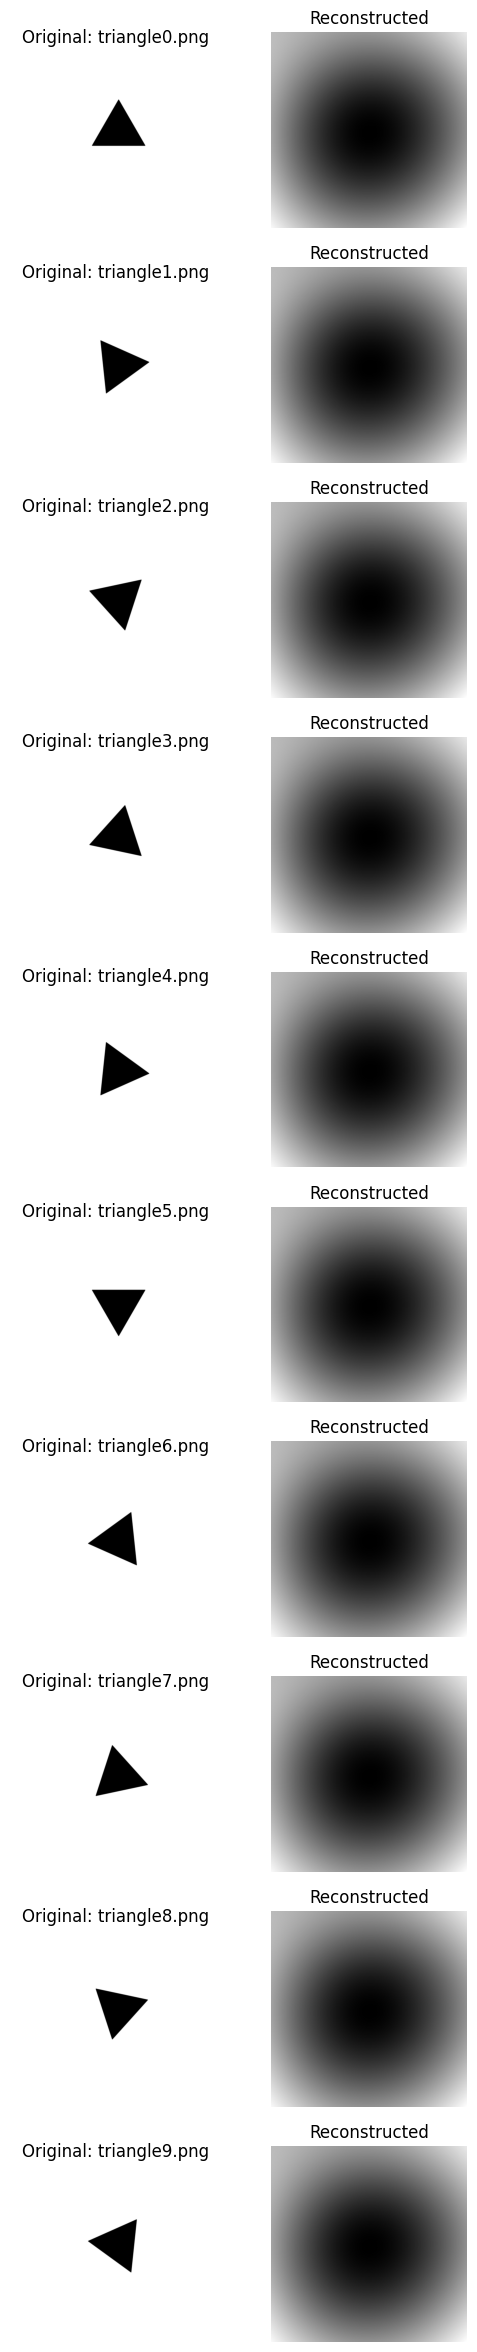

In [ ]:
# Compare images and their reconstructions visually

latent_vecs = ckpt['latent_vectors']

resolution = 256
grid = get_coordinate_grid(resolution)

n = len(latent_vecs)
fig, ax = plt.subplots(n, 2, figsize=(6,3*n))

# Sort images so we loop through in desired order
sorted_latent_vecs = sorted(
    latent_vecs.items(),
    key=lambda kv: int(Path(kv[0]).stem.replace("triangle", "")),
)

for i, (im_path, latent_vec) in enumerate(sorted_latent_vecs):

    # Obtain original image
    im = np.array(Image.open(im_path).convert('L'))

    ax[i, 0].imshow(im, cmap = 'gray')
    ax[i, 0].set_title(f'Original: {Path(im_path).name}')
    ax[i, 0].axis('off')

    # Obtain reconstructed image
    with torch.no_grad():
        im_reconstructed = model.reconstruct_image(grid, latent_vec).numpy().squeeze()

    ax[i, 1].imshow(im_reconstructed, cmap = 'gray')
    ax[i, 1].set_title('Reconstructed')
    ax[i, 1].axis('off')
